In [2]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# To plot pretty figures
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Plot Grayscale images 
def plot_image(image):
    plt.imshow(image, cmap='gray', interpolation='nearest')
    plt.axis('off')
    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8), interpolation='nearest')
    plt.axis("off")

### Convolutional Layer 

In [69]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
image = china[150:220, 130:250] ## Only extracting a specific portion of the image 
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

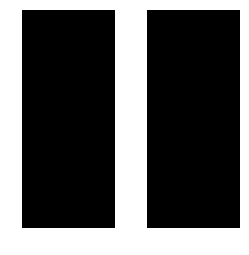

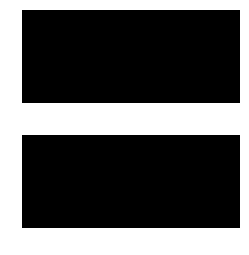

In [77]:
fmap = np.zeros(shape = (7,7,1,2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
plot_image(fmap[:, :, 0, 0])
plt.show()
plot_image(fmap[:, :, 0, 1])

In [81]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(input=X, filter=feature_maps, strides=[1, 2, 2, 1], padding='SAME')
init = tf.global_variables_initializer()

In [83]:
with tf.Session() as sess:
    init.run()
    output = sess.run(convolution, feed_dict={X: images})

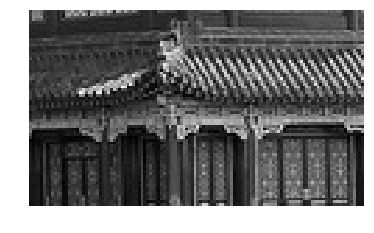

In [86]:
plot_image(images[0, :, :, 0]) # Image without any filtered applied 
plt.show()

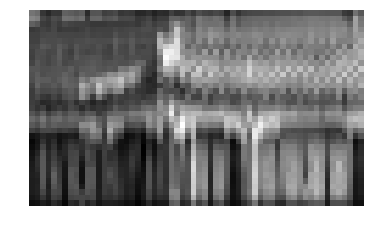

In [88]:
# Vertical filter 
plot_image(output[0, :, :, 0])

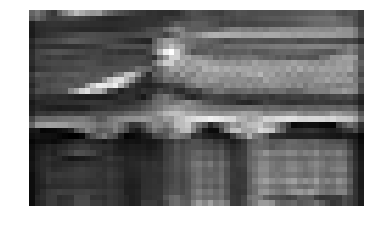

In [89]:
# Horizontal filter
plot_image(output[0, :, :, 1])

### A simple example

In [110]:
from sklearn.datasets import load_sample_images

# Load sample images 
dataset = np.array(load_sample_images().images, dtype=np.float32)
batch_size, height, weight, channels = dataset.shape

# Create 2 filters to detect vertical and horizontal edges 
filters_test = np.zeros(shape = (7,7,channels,2), dtype=np.float32)
filters_test[:, 3, :, 0] = 1 # vertical line
filters_test[3, :, :, 1] = 1 # Horizontal line

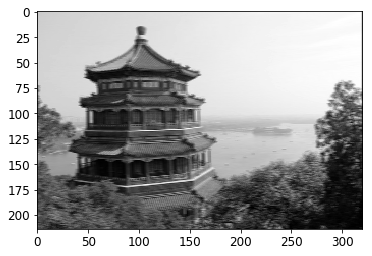

In [91]:
# Create a graph with input X plus a convolutional layer applying the 2 filters
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, height, weight, channels))
filters = tf.constant(filters_test)
convolution = tf.nn.conv2d(input=X, filter=filters, strides=[1, 2, 2, 1], padding='SAME')

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(convolution, feed_dict={X : dataset})

plt.imshow(output[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

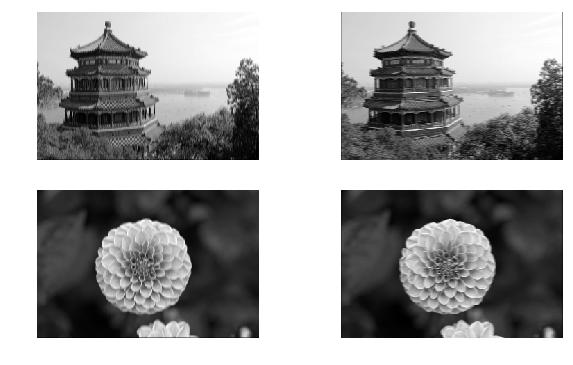

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        axes[image_index, feature_map_index].imshow(output[image_index, :, :, feature_map_index], cmap='gray', interpolation='nearest')
        axes[image_index, feature_map_index].axis('off')

### Pooling layer

In [116]:
batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

In [121]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

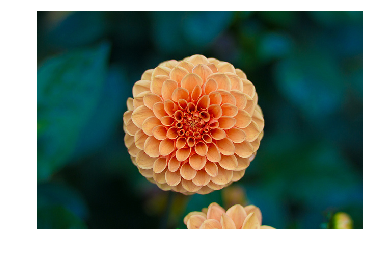

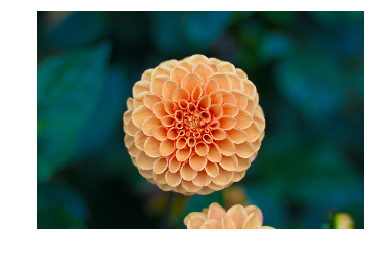

In [125]:
plot_color_image(dataset[1])
plt.show()
    
plot_color_image(output[1])
plt.show()